
# Project: Investigate a Dataset - TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 

Dataset - I will be analysing **TMDb movie data** This data set contains information on movies collected from The Movie Database (TMDb), including user ratings and revenue.

- **id**  - This is the movie ID which should be unique for each movie    
- **imdb_id** - This is movie name ID       
- **popularity** - This is a column whhich has data on how popular the movie is as a proportion
- **budget** - This is the budget for each movie that is in dollars      
- **revenue** - This is the total revenue each movie is generating in dollars        
- **original_title** - This is movie title 
- **cast** - Actors for different roles in a movie   
- **homepage** - It includes the homepage links for different movies           
- **director** - Movie director names      
- **tagline**  - This is a movie tag that contains summary of the movie 
- **keywords** - This is keywords best descriping the movie 
- **overview** - This is an overview text on what the movie covers  
- **runtime**  - This is total period of the movie in minutes
- **genres**   - This is the category the movie falls in   
- **production_companies** - This is the production company that produced the movie
- **release_date** - This is the date when the movie was released
- **vote_count**   - This is the number of votes voted for each movie   
- **vote_average** - This is the average number of 
- **release_year** - This is the year the movie was released
- **budget_adj**   -  
- **revenue_adj**  -



### Question(s) for Analysis
- Which genres are popular over time? 
- Which movie(s) made the most profit?
- Which movie(s) were the longest?
- What is the relationship between movie duration and votes?
- How does popularity affect votes and performances?
- How has movie(s) costing increased over the years?


<a id='wrangling'></a>
## Data Wrangling

In [1]:
#let us now import packages that we are going to use in this project
#This is for opening the charts inline or on the file
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
# Load your data and print out a few lines. Perform operations to inspect data
#Read data
redwine=pd.read_csv("Data//whinequality-red.csv")
#Check the dataset content by sampling any 5 rows
redwine.sampl(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
8668,4247,tt0175142,1.815244,19000000,278019771,Scary Movie,Carmen Electra|Dave Sheridan|Anna Faris|Jon Ab...,NaN,Keenen Ivory Wayans,No mercy. No shame. No sequel.,...,Following on the heels of popular teen-scream ...,88,Comedy,Gold/Miller Productions|Wayans Bros. Entertain...,7/7/00,681,5.9,2000,2.405955e+07,3.520542e+08
2620,24020,tt0206064,0.100410,0,0,Johnny Tsunami,Brandon Baker|Yuji Okumoto|Mary Page Keller|Le...,NaN,Steve Boyum,The Temperature Is Down But The Surf Is Up!,...,A Hawaiian teenage surfer shows off his skills...,88,TV Movie|Family|Drama,Film Roman Productions,7/24/99,12,4.9,1999,0.000000e+00,0.000000e+00
288,274504,tt1735907,0.433073,0,0,The Adderall Diaries,James Franco|Amber Heard|Ed Harris|Christian S...,NaN,Pamela Romanowsky,The truth is a motherf_cker.,...,Writer and Adderall enthusiast Stephen Elliott...,105,Thriller|Action|Drama,RabbitBandini Productions|Windowseat Films,4/16/15,23,4.8,2015,0.000000e+00,0.000000e+00
5144,2518,tt0346293,0.249204,0,0,Hitler: The Rise of Evil,Robert Carlyle|Stockard Channing|Jena Malone|J...,NaN,Christian Duguay,NaN,...,The movie describes the life of Adolf Hitler f...,179,Drama|War|History,Alliance Atlantis Communications,3/18/03,65,6.7,2003,0.000000e+00,0.000000e+00
8107,8012,tt0113161,0.901780,30250000,115101622,Get Shorty,John Travolta|Gene Hackman|Rene Russo|Danny De...,NaN,Barry Sonnenfeld,"The mob is tough, but itâ€™s nothing like show...",...,A mobster travels to Hollywood to collect a de...,105,Comedy|Thriller|Crime,Jersey Films|Metro-Goldwyn-Mayer (MGM),10/20/95,139,6.1,1995,4.328675e+07,1.647066e+08


In [3]:
#Let us check the shape of our data in terms of (rows, columns)
shape=movies_data.shape
print('Shape of data:', shape)

Shape of data: (10866, 21)


In [4]:
movies_data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
#Summary of data
movies_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From this statistical summary we can find out that; 
- There are quite a number of movies that had **0** revenue and the the movie with the highest revenue was 24Million dollars. It will be good to investigate why there are movies with zero budget and zero revenue
- There are movies that had runtime as **0** which means the movie is not there it is only the movie title. This is something we can find out why. Also there is a movie with 900min which is also another thing we need to investigate why that movie is that long
- Most of the movies were produced in 2006 and very few movies produced in 1965. This sows that number of movies are directly proportional to period


In [6]:
#Check the column data types
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
#Check for duplicates 
movies_data.duplicated().sum()

1

In [8]:
# We have 1 duplicate rows so we are going to drop the duplicated row
df=movies_data.drop_duplicates()
#Now let us check if the duplicate is still there
df.duplicated().sum()

0

In [9]:
#After removing the duplicated rows, let us now check the nulls
#Checking the propotion of null values in each column
movies_data.isnull().sum()/len(movies_data)*100.0

id                       0.000000
imdb_id                  0.092030
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699429
homepage                72.979937
director                 0.404933
tagline                 25.989324
keywords                13.740107
overview                 0.036812
runtime                  0.000000
genres                   0.211669
production_companies     9.479109
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64

1. `Homepage` has the highest number of nulls which is **72%**. This is very high number of nulls and we can drop or not use the column in analysis since it has very low significance to our data.
This applies to `Tagline` and `keywords` that have **25%** and **13%** respectively.
We have Nulls in `production_companies` column of **9%** . This is a high proportion on an important column on the movies dataset because we will like to know which production company has produced more movies and how each company is generating income from these movies

2. `genres`, `overview`, `cast` and `imdb_id` columns have less than **1%** and we can drop the nulls when we want to use these columns in our analysis

3. From this I am going to drop the following columns that have high proportion of nulls since they are not much of significance in my analysis
- homepage
- tagline
- keywords
4. I will keep `production_companies` column. It is important to know which production company produced more movies or which one is expensive to produce a movie or which company made more income

In [10]:
#Drop homepage, tagline and keywords columns from our dataset
movies_df = movies_data.drop(["homepage","tagline","keywords"], axis=1)

In [11]:
#Now let us confirm the shape of the data and see if it has removed the 3 columns
#Previously we had 21 columns
print('Shape of data:', movies_df.shape)

Shape of data: (10866, 18)


In [12]:
#Checking the propotion of null values in each column again after droping some columns
movies_df.isnull().sum()/len(movies_data)*100.0

id                      0.000000
imdb_id                 0.092030
popularity              0.000000
budget                  0.000000
revenue                 0.000000
original_title          0.000000
cast                    0.699429
director                0.404933
overview                0.036812
runtime                 0.000000
genres                  0.211669
production_companies    9.479109
release_date            0.000000
vote_count              0.000000
vote_average            0.000000
release_year            0.000000
budget_adj              0.000000
revenue_adj             0.000000
dtype: float64

In [13]:
#checking the total rows that have nulls in imdb_id, cast, director, overview, genres and production_companies
movies_df[["imdb_id","cast","director","overview","genres","production_companies"]].isna().sum()

imdb_id                   10
cast                      76
director                  44
overview                   4
genres                    23
production_companies    1030
dtype: int64

From above we can find out the total number of rows of null each column we identified have.
The columns of interest are `genres` and `production_companies` where genres have 23 rows with null and production companies column have 1030 rows with null.
We will like to know why production companies had nulls in those specific columns in our next analysis

In [14]:
#Subset data to a data that has null in production companies
null_movies_companies=movies_df[movies_df["production_companies"].isnull()]
#let us check the shape of the data. It should be equal to 1030 rows as we saw earlier
print("Shape of data is:",null_movies_companies.shape)

Shape of data is: (1030, 18)


In [15]:
#Let us subset data for movie id, revenue and budget of each movie that had null production company data
null_movies_companies[["id","budget","revenue"]]

,id,budget,revenue
228,300792,0,0
259,360603,0,0
295,363483,0,0
298,354220,0,0
328,308457,0,0
...,...,...,...
10804,15867,0,0
10806,24998,0,0
10816,16378,0,0
10842,36540,0,0


<AxesSubplot:xlabel='id', ylabel='budget'>

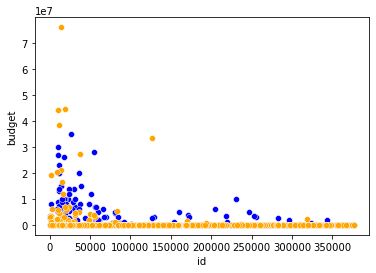

In [16]:
#Create a scatter plot to find out the correlation between budget and movie companies 
sns.scatterplot(data=null_movies_companies, x="id", y="budget", color='blue')
sns.scatterplot(data=null_movies_companies, x="id", y="revenue",color='orange')

In [17]:
#now let us filter data with 0 budget and count how many movies have budget as zero
subset_null_companies=null_movies_companies[["id","budget","revenue"]]
subset_null_companies[subset_null_companies["budget"]==0].count()

id         894
budget     894
revenue    894
dtype: int64

From the scatter plot above it shows that **Most data that had movie company as null had a budget and revenue of 0 dollar or less than 1 dollar**
This means that there was no company that was trying to produce a movie that has no budget


### Data Cleaning

In [18]:
#I m going to use dataset I saved as movies_df where I dropped unseful columns in my strudy
#Let us fill "Not defined" to null values under categorical columns
movies_df['production_companies'].fillna("Not defined", inplace=True)
movies_df['cast'].fillna("Not defined", inplace=True)
movies_df['genres'].fillna("Not defined", inplace=True)
movies_df['director'].fillna("Not defined", inplace=True)
movies_df['overview'].fillna("Not defined", inplace=True)
movies_df['imdb_id'].fillna("NaN", inplace=True)
#checking the total rows that have nulls in imdb_id, cast, director, overview, genres and production_companies
#movies_data[["imdb_id","cast","director","overview","genres","production_companies"]].isna().sum()
movies_df.isnull().sum()/len(movies_df)*100.0

id                      0.0
imdb_id                 0.0
popularity              0.0
budget                  0.0
revenue                 0.0
original_title          0.0
cast                    0.0
director                0.0
overview                0.0
runtime                 0.0
genres                  0.0
production_companies    0.0
release_date            0.0
vote_count              0.0
vote_average            0.0
release_year            0.0
budget_adj              0.0
revenue_adj             0.0
dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 

#### 1.Which genres are popular over time?

In [19]:
#Explode genres column to have each genre list on its own row
df=movies_data
df.genres = df.genres.str.split('|')                                                               
data_explode=df.explode("genres")
data_explode.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [47]:
#Alternative way of getting genres
df = pd.concat([df, df["genres"].str.get_dummies(sep="|")], axis=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Columns: 2060 entries, id to ['Western']
dtypes: float64(4), int64(2045), object(11)
memory usage: 170.8+ MB


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,"['Western', 'Comedy']","['Western', 'Drama', 'Adventure', 'Thriller']","['Western', 'Drama', 'Comedy', 'Romance']","['Western', 'Drama', 'Crime', 'Romance']","['Western', 'Drama']","['Western', 'History', 'War']","['Western', 'History']","['Western', 'Horror', 'Thriller']","['Western', 'Thriller']",['Western']
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,0,0,0,0,0,0,0,0,0,0
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,0,0,0,0,0,0,0,0,0,0
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,0,0,0,0,0,0,0,0,0,0
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,0,0,0,0,0,0,0,0,0,0
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#Cacluate aggregated data for each genre
types_data=data_explode
data= types_data.groupby(["release_year","genres"])["genres"].count().reset_index(name="count")
data

,release_year,genres,count
0,1960,Action,8
1,1960,Adventure,5
2,1960,Comedy,8
3,1960,Crime,2
4,1960,Drama,13
...,...,...,...
1044,2015,Science Fiction,86
1045,2015,TV Movie,20
1046,2015,Thriller,171
1047,2015,War,9


In [40]:
#Find the aggregated data
sort_count=data.groupby(["genres"])["count"].sum().reset_index(name="count")
#sort data using the count
sort_count_df=sort_count.sort_values('count', ascending=False)
sort_count_df.head()

,genres,count
6,Drama,4761
3,Comedy,3793
17,Thriller,2908
0,Action,2385
14,Romance,1712


In [41]:
sort_count_df.tail()

,genres,count
10,History,334
18,War,270
9,Foreign,188
16,TV Movie,167
19,Western,165


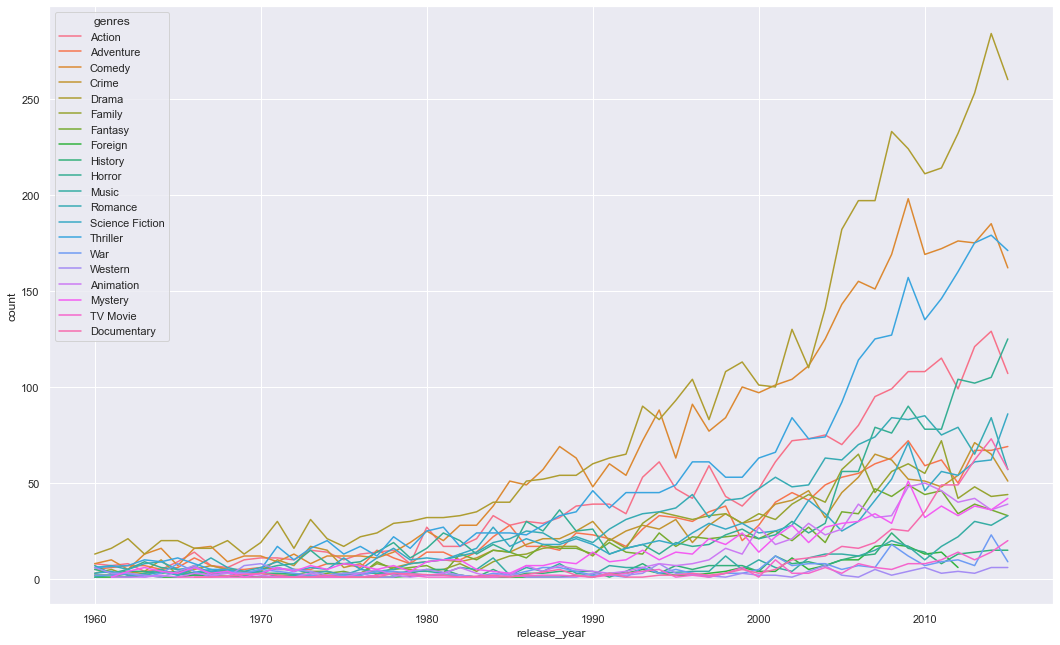

In [37]:
#Create a plot to show the relationship of the count of each genre with time
ax1=sns.lineplot(data=data, x="release_year",y="count",hue="genres" 
#                  , palette=dict(Action="#DFFF00", Adventure="#FFBF00", Comedy="#FFBF00", Crime="#DE3163", Drama="#9FE2BF",
#                              Family="#40E0D0",Science Fiction="", TV Movie="", Mystery=, 'Animation', 'Horror', 'Western', 
#                               'Documentary', 'Romance', 'History', 'Foreign', 'Thriller', 'Music', 'War', 'Fantasy')
                )
ax1=sns.set(rc = {'figure.figsize':(18,10)})
import mplcursors
mplcursors.cursor(hover=True)

From the graph we can find out that **Drama** was more popular genre movies and it increased highly over time followed by **Comedy** and **Thriller**
We also see that **Western** and **TV Movie** was least popular genre movies

### Research Question 2 

#### Which movie(s) made the most profit?

In [23]:
#Find aggregated data grouped by movie title
movie_data= movies_data.groupby(["original_title","revenue"])["revenue"].sum().reset_index(name="total_revenue")
#Let us sort the data using total revenue in descending order
movie_data_df = movie_data.sort_values('total_revenue', ascending=False)
movie_data_df.head()

,original_title,revenue,total_revenue
828,Avatar,2781505847,2781505847
7516,Star Wars: The Force Awakens,2068178225,2068178225
9919,Titanic,1845034188,1845034188
7998,The Avengers,1519557910,1519557910
4517,Jurassic World,1513528810,1513528810


In [24]:
movie_data_df.tail()

,original_title,revenue,total_revenue
4571,Keith Richards: Under the Influence,0,0
4570,Keith,0,0
4567,Keepers of the Covenant: Making Exodus: Gods a...,0,0
4566,Keep the Lights On,0,0
10783,í•˜ìš¸ë§,0,0


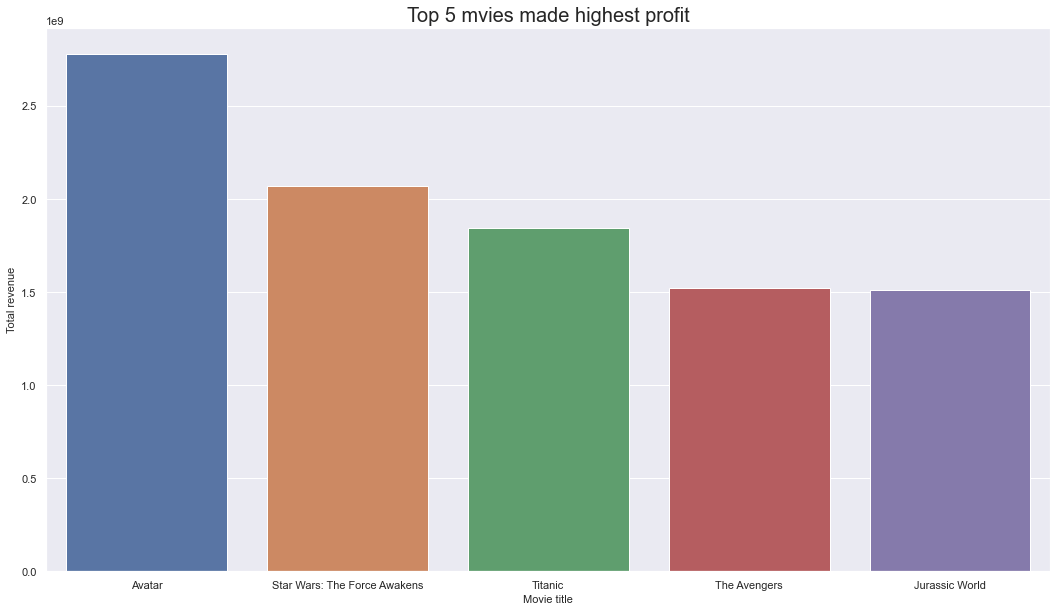

In [25]:
### Create a barchart for top 5 movies that generated high profit
profit_data=movie_data_df.head(5)
ax2 = sns.barplot(x="original_title", y="total_revenue", data=profit_data)
ax2=sns.set(rc = {'figure.figsize':(8,4)})
# label the plot
plt.xlabel('Movie title', size = 11); plt.ylabel('Total revenue', size = 11); 
plt.title('Top 5 mvies made highest profit', size = 20);


From the above we find out that **Avatar** made the highest revenue of 2.7Billion dollars followed by **Star Wars: The Force Awakens** that made 2Billion dollars
We also see that there are movies that made 0 revenue which means they didn't make any profit. Movies like **Keith Richards: Under the Influence**

### Research Question 3 
#### Which movie(s) were the longest?

In [26]:
#Find the movie that had longest story using period
#Subset data to have just movie title and time
period_data =movies_data[["original_title","runtime"]]
#Let us sort the data using total revenue in descending order
movie_data_df = period_data.sort_values('runtime', ascending=False)
movie_data_df.head()

,original_title,runtime
3894,The Story of Film: An Odyssey,900
4041,Taken,877
2722,Band of Brothers,705
6176,Shoah,566
6181,"North and South, Book I",561


In [27]:
#Movies that took short time
movie_data_df.tail()

,original_title,runtime
3329,"Grande, grosso e Verdone",0
4138,A Time for Dancing,0
1241,Dance-Off,0
6383,The 12 Dogs of Christmas,0
5216,Madea's Class Reunion,0


In [44]:
average_runtime = movies_data["runtime"].mean()
print('Average runtime is:',average_runtime)

Average runtime is: 102.07086324314375


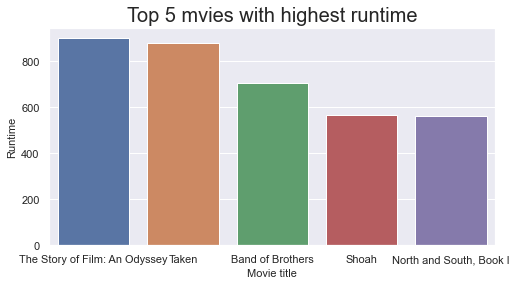

In [28]:
### Create a barchart for top 5 movies that generated high profit
runtime_data=movie_data_df.head(5)
ax3 = sns.barplot(x="original_title", y="runtime", data=runtime_data)
ax3=sns.set(rc = {'figure.figsize':(8,4)})
# label the plot
plt.xlabel('Movie title', size = 11); plt.ylabel('Runtime', size = 11); 
plt.title('Top 5 mvies with highest runtime', size = 20);


**The Story of Film: An Odyssey** was longest that took 900minutes followed by **Taken** that took 877 minutes.
There are some movies that was taking 0 minutes which does not make sense that one can upload a movie that is 0 minutes long.
This can happen if it was an image that was uploaded. 

The average runtime is **102** Minutes

### Research Question 4 
#### How has movie(s) costing increased over the years?

In [29]:
#Find aggregated data grouped by movie title
budget_data= movies_data.groupby(["release_year","budget"])["budget"].sum().reset_index(name="total_budget")
budget_data.head(10)

,release_year,budget,total_budget
0,1960,0,0
1,1960,30000,30000
2,1960,200000,200000
3,1960,270000,270000
4,1960,750000,750000
5,1960,806948,806948
6,1960,2000000,2000000
7,1960,3000000,6000000
8,1960,12000000,12000000
9,1961,0,0


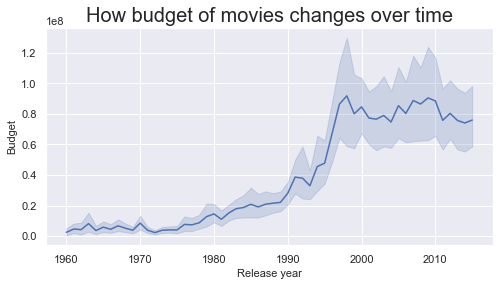

In [30]:
#Plot a graph to show how the budget changes over time
ax1=sns.lineplot(data=budget_data, x="release_year",y="total_budget")
# label the plot
plt.xlabel('Release year', size = 11); plt.ylabel('Budget', size = 11); 
plt.title('How budget of movies changes over time', size = 20);


From the findings on the chart, there has been increase of movie production cost over time. It has been seen that there was a high shoot between 1990 nand 2000 where the cost increased significantly. This can be caused by inflation or increase of cost of the production materials

<a id='conclusions'></a>
## Conclusions
1. We can find out that **Drama**, **Comedy**, **Thriller** and **Action** were the most popular movies.
2. We also noticed that **Avatar** and **Star Wars: The Force Awakens** made highest profits of over 2Billion dollars
3. The average runtime for movies is **102 Minutes**
4. Between 1990 and 2000 the cost of producing a movie increased significantly.

### Data source Limitations
- There was no clear definitions of the columns and what they were measuring. Some column headers like now we have **revenue** and **revenue_adj** where we dont know what revenue_adj measures and what is the difference between the two columns. This is also seen on **budget** column and **budget_adj** column
- There was also no clear definitions on the SI unit for revenue which I assumed to be in dollars. Some other columns like **vote_average** and **popularity** are not clear what measurement they are measure in. Is it by percentage or on a scale?


In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!